In [ ]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 

In [ ]:
train_data = pd.read_excel("/content/stroke-data.xlsx")
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Y
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Y
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Y
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Y
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Y


In [ ]:
print(train_data.shape)

(5110, 12)


In [ ]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 479.2+ KB


In [ ]:
def missing_values(df): 
    a = num_null_values = df.isnull().sum()  
    return a 

In [ ]:
missing_values(train_data)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
train_data.drop(["id","age"], axis=1, inplace=True)

In [ ]:
train_data

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Y
1,Female,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Y
2,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Y
3,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,Y
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Y
...,...,...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,83.75,NaN,never smoked,N
5106,Female,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,N
5107,Female,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,N
5108,Male,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,N


In [ ]:
### Dealing with null values [ categorical ] ### 

cols = train_data[["gender", "ever_married", "Residence_type"]] 
for  i in cols: 
    train_data[i].fillna(train_data[i].mode().iloc[0], inplace=True)

In [ ]:
train_data.isnull().sum()

gender                 0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#### Dealing with Numerical Values missig_data ##  

n_cols = train_data[["hypertension", "heart_disease", "bmi"]] 
for i in n_cols: 
    train_data[i].fillna(train_data[i].mean(axis=0), inplace=True)

In [ ]:
### Visualization###  
def bar_chart(col): 
    Approved = train_data[train_data["stroke"]=="Y"][col].value_counts() 
    Disapproved = train_data[train_data["stroke"]=="N"][col].value_counts() 
    
    df1 = pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    df1.plot(kind="bar")

In [ ]:
import pandas as pd

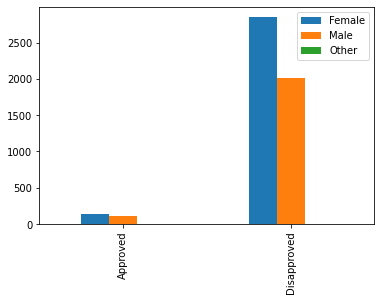

In [ ]:
bar_chart("gender")

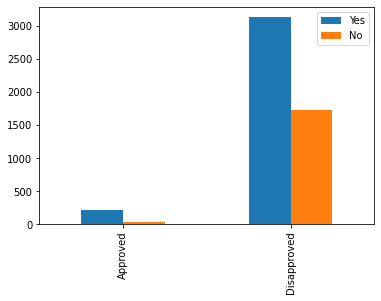

In [ ]:
bar_chart("ever_married")

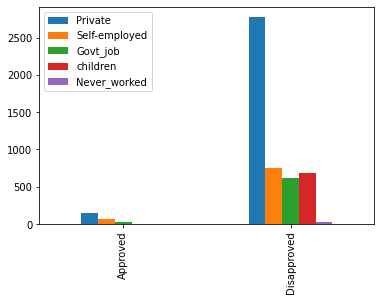

In [ ]:
bar_chart("work_type")

In [ ]:
train_data

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Y
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Y
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Y
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Y
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Y
...,...,...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,N
5106,Female,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,N
5107,Female,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,N
5108,Male,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,N


In [ ]:
from sklearn.preprocessing import OrdinalEncoder 

ord_enc = OrdinalEncoder() 
train_data[["gender",'ever_married','hypertension','heart_disease','work_type','Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']] = ord_enc.fit_transform(train_data[["gender",'ever_married','hypertension','heart_disease','work_type','Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']])
train_data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.0,1.0,1.0,2.0,1.0,3850.0,240.0,1.0,1.0
1,0.0,0.0,0.0,1.0,3.0,0.0,3588.0,162.0,2.0,1.0
2,1.0,0.0,1.0,1.0,2.0,0.0,2483.0,199.0,2.0,1.0
3,0.0,0.0,0.0,1.0,2.0,1.0,3385.0,218.0,3.0,1.0
4,0.0,1.0,0.0,1.0,3.0,0.0,3394.0,113.0,2.0,1.0


In [ ]:
train_data[["gender",'ever_married','hypertension','heart_disease','work_type','Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']] = train_data[["gender",'ever_married','hypertension','heart_disease','work_type','Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']] 

In [ ]:
train_data

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.0,1.0,1.0,2.0,1.0,3850.0,240.0,1.0,1.0
1,0.0,0.0,0.0,1.0,3.0,0.0,3588.0,162.0,2.0,1.0
2,1.0,0.0,1.0,1.0,2.0,0.0,2483.0,199.0,2.0,1.0
3,0.0,0.0,0.0,1.0,2.0,1.0,3385.0,218.0,3.0,1.0
4,0.0,1.0,0.0,1.0,3.0,0.0,3394.0,113.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,1.0,0.0,1.0,2.0,1.0,1360.0,162.0,2.0,0.0
5106,0.0,0.0,0.0,1.0,3.0,1.0,3030.0,274.0,2.0,0.0
5107,0.0,0.0,0.0,1.0,3.0,0.0,1314.0,180.0,2.0,0.0
5108,1.0,0.0,0.0,1.0,2.0,0.0,3363.0,129.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split  
X = train_data.drop("stroke", axis=1) 
y = train_data["stroke"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2) 
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(4088, 9)
(4088,)
(1022, 9)
(1022,)


In [ ]:
from sklearn.naive_bayes import GaussianNB 

gfc = GaussianNB() 
gfc.fit(X_train, y_train) 
pred1 = gfc.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred): 
    pre=  precision_score(y_true, y_pred) 
    rec = recall_score(y_true, y_pred) 
    acc = accuracy_score(y_true, y_pred) 
    
    print(pre) 
    print(rec) 
    print(acc)

In [ ]:
loss(y_test, pred1)

0.18018018018018017
0.39215686274509803
0.8806262230919765


In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.951 total time=   1.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.951 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.951 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.951 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.951 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.951 total time=   0.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.951 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
svc = SVC(C= 0.1, gamma= 1, kernel= 'rbf')  
svc.fit(X_train, y_train) 
pred2 = svc.predict(X_test) 
loss(y_test,pred2)

0.0
0.0
0.9500978473581213


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train) 
pred3 = xgb.predict(X_test) 
loss(y_test, pred3)

0.3076923076923077
0.0784313725490196
0.9452054794520548


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

In [ ]:
randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.952
Test score: 0.950


DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')

In [ ]:
ds = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds.fit(X_train, y_train) 
pred4 =ds.predict(X_test) 
loss(y_test, pred4)

0.0
0.0
0.9500978473581213


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2)) 

Training score: 0.952
Test score: 0.950


RandomForestClassifier(max_depth=8, min_impurity_decrease=0.2, random_state=2)

In [ ]:
import joblib 
joblib.dump(ds, "stroke_model.pkl") 
model = joblib.load('stroke_model.pkl' ) 
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])